In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline


df = pd.read_csv("C:/Users/nrampersad/Downloads/Downloads AAHP/2021/Udacity/GVP_Volcano_List_Holocene1.csv")
df.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Date converted,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,355130,"Ojos del Salado, Nevados",Chile-Argentina,Stratovolcano,Eruption Dated,750 CE,NaN,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km)
1,355110,Llullaillaco,Chile-Argentina,Stratovolcano,Eruption Observed,1877 CE,NaN,South America,"Northern Chile, Bolivia and Argentina",-24.720,-68.530,6739,Dacite,Subduction zone / Continental crust (>25 km)
2,355220,Tipas,Argentina,Complex,Evidence Credible,Unknown,NaN,South America,"Northern Chile, Bolivia and Argentina",-27.196,-68.561,6658,No Data (checked),Subduction zone / Continental crust (>25 km)
3,355125,"Incahuasi, Nevado de",Chile-Argentina,Stratovolcano(es),Evidence Uncertain,Unknown,NaN,South America,"Northern Chile, Bolivia and Argentina",-27.033,-68.296,6638,Dacite,Subduction zone / Continental crust (>25 km)
4,354003,Coropuna,Peru,Stratovolcano,Evidence Credible,Unknown,NaN,South America,Peru,-15.520,-72.650,6377,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)


In [33]:
df.describe() # Summary statistics associated with the quantitative variables 

,Volcano Number,Latitude,Longitude,Elevation (m)
count,1398.000000,1398.000000,1398.000000,1398.000000
mean,297031.030043,14.787760,22.625187,1694.133047
std,48652.565558,31.913561,114.536931,1597.027543
min,210010.000000,-78.500000,-179.970000,-5700.000000
25%,261162.500000,-6.955750,-78.440500,734.000000
50%,300051.500000,14.042000,38.156500,1477.000000
75%,342137.500000,43.135250,139.346500,2371.500000
max,390847.000000,85.608000,179.580000,6879.000000


In [23]:
df.groupby(['Country','Region'])['Elevation (m)'].max()

Country             Region                        
Algeria             Africa and Red Sea                2918
Antarctica          Antarctica                        3794
Argentina           South America                     6658
Armenia             Mediterranean and Western Asia    4095
Armenia-Azerbaijan  Mediterranean and Western Asia    3139
                                                      ... 
United States       New Zealand to Fiji                931
Vanuatu             Melanesia and Australia           1496
Vietnam             Philippines and SE Asia           1000
Yemen               Africa and Red Sea                 624
                    Middle East and Indian Ocean      3500
Name: Elevation (m), Length: 115, dtype: int64


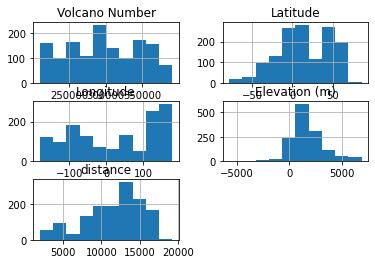

In [112]:
df.hist();

In [115]:
print(df[df['Elevation (m)']==df['Elevation (m)'].max()]) # Highest Volcano

   Volcano Number              Volcano Name          Country  \
0          355130  Ojos del Salado, Nevados  Chile-Argentina   

  Primary Volcano Type Activity Evidence Last Known Eruption         Region  \
0        Stratovolcano    Eruption Dated              750 CE  South America   

                               Subregion  Latitude  Longitude  Elevation (m)  \
0  Northern Chile, Bolivia and Argentina   -27.109    -68.541           6879   

  Dominant Rock Type                              Tectonic Setting  distance  
0             Dacite  Subduction zone / Continental crust (>25 km)  9328.616  


In [20]:
df[df['Elevation (m)']==df['Elevation (m)'].max()] # Highest Volcano

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,355130,"Ojos del Salado, Nevados",Chile-Argentina,Stratovolcano,Eruption Dated,750 CE,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km)


In [32]:
df.isnull().any() # Check for columns with blanks

Volcano Number          False
Volcano Name            False
Country                 False
Primary Volcano Type    False
Activity Evidence       False
Last Known Eruption     False
Region                  False
Subregion               False
Latitude                False
Longitude               False
Elevation (m)           False
Dominant Rock Type       True
Tectonic Setting         True
dtype: bool

In [96]:
df['Country'].value_counts() # Most volcanoes per country

United States                166
Russia                       142
Indonesia                    124
Japan                        107
Chile                         71
                            ... 
Ethiopia-Eritrea-Djibouti      1
Eritrea-Djibouti               1
Colombia-Ecuador               1
China-North Korea              1
Saint Lucia                    1
Name: Country, Length: 93, dtype: int64

In [97]:
df['Primary Volcano Type'].value_counts() # Volcano Types in descending order

Stratovolcano          564
Shield                 121
Stratovolcano(es)      117
Submarine              115
Pyroclastic cone(s)     88
Volcanic field          80
Caldera                 76
Complex                 52
Shield(s)               33
Lava dome(s)            29
Pyroclastic cone        16
Fissure vent(s)         15
Compound                12
Caldera(s)              10
Maar(s)                 10
Tuff cone(s)             9
Pyroclastic shield       8
Lava dome                8
Maar                     6
Crater rows              6
Subglacial               5
Fissure vent             3
Tuff cone                3
Lava cone                2
Stratovolcano?           2
Submarine(es)            2
Lava cone(s)             1
Complex(es)              1
Tuff ring(s)             1
Explosion crater(s)      1
Lava cone(es)            1
Cone(s)                  1
Name: Primary Volcano Type, dtype: int64

In [98]:
df['Last Known Eruption'].value_counts() # Eruptions per year observed in descending order


Unknown     532
2021 CE      57
2020 CE      15
2019 CE      13
2008 CE      12
           ... 
778 BCE       1
1190 CE       1
1544 CE       1
1600 BCE      1
3600 BCE      1
Name: Last Known Eruption, Length: 399, dtype: int64

In [108]:
targets = df.loc[df['Last Known Eruption'] == "2021 CE", ['Volcano Name']] #Volcanoes active this year
print(targets)

                Volcano Name
20                 Sabancaya
59              Popocatepetl
62                    Sangay
63          Ruiz, Nevado del
81              Klyuchevskoy
138                  Kerinci
139                   Erebus
144                    Fuego
146              Santa Maria
153                   Semeru
160               Reventador
177               Nyiragongo
188                Turrialba
191                     Etna
194                Sheveluch
197                    Raung
204      Chillan, Nevados de
222              Nyamulagira
240        Lengai, Ol Doinyo
249                   Merapi
254               Bezymianny
261               Villarrica
278                    Heard
294   Fournaise, Piton de la
304                   Pacaya
306   Dieng Volcanic Complex
319               Veniaminof
329                 Sinabung
363          Tengger Caldera
525                   Bagana
546                    Manam
555              Karangetang
572            San Cristobal
576           

In [129]:
# Closest Volcano to Johannesburg

from math import radians, cos, sin, asin, sqrt
def dist(Longitude1,Latitude1,Longitude2,Latitude2 ):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    Longitude1,Latitude1, Longitude2,Latitude2  = map(radians, [Longitude1, Latitude1,Longitude2,Latitude2])
    # haversine formula 
    dlon = Longitude2 - Longitude1  
    dlat = Latitude2 - Latitude1 
    a = sin(dlat/2)**2 + cos(Latitude1) * cos(Latitude2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

df['distance'] = [dist(df.Longitude[i],df.Latitude[i], 28.2411459,-26.1366728) 
                  for i in range(len(df))]
df['distance'] = df['distance'].round(decimals=3)

df.head(296)

print(df[df['distance']==df['distance'].min()])


     Volcano Number Volcano Name   Country Primary Volcano Type  \
408          222170        Kyejo  Tanzania        Stratovolcano   

     Activity Evidence Last Known Eruption Date converted              Region  \
408  Eruption Observed             1800 CE            NaN  Africa and Red Sea   

            Subregion  Latitude  Longitude  Elevation (m)  \
408  Africa (eastern)    -9.229     33.792           2176   

          Dominant Rock Type                        Tectonic Setting  distance  
408  Trachyte / Trachydacite  Rift zone / Continental crust (>25 km)  1969.032  


In [130]:
df.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Date converted,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting,distance
0,355130,"Ojos del Salado, Nevados",Chile-Argentina,Stratovolcano,Eruption Dated,750 CE,NaN,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km),9328.616
1,355110,Llullaillaco,Chile-Argentina,Stratovolcano,Eruption Observed,1877 CE,NaN,South America,"Northern Chile, Bolivia and Argentina",-24.720,-68.530,6739,Dacite,Subduction zone / Continental crust (>25 km),9445.735
2,355220,Tipas,Argentina,Complex,Evidence Credible,Unknown,NaN,South America,"Northern Chile, Bolivia and Argentina",-27.196,-68.561,6658,No Data (checked),Subduction zone / Continental crust (>25 km),9326.105
3,355125,"Incahuasi, Nevado de",Chile-Argentina,Stratovolcano(es),Evidence Uncertain,Unknown,NaN,South America,"Northern Chile, Bolivia and Argentina",-27.033,-68.296,6638,Dacite,Subduction zone / Continental crust (>25 km),9310.596
4,354003,Coropuna,Peru,Stratovolcano,Evidence Credible,Unknown,NaN,South America,Peru,-15.520,-72.650,6377,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),10297.958


In [131]:
df.loc[(df['Last Known Eruption'] == "2021 CE") & (df['distance'] <3000)] #Active volcanoes within 3000km radius of Jhb

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Date converted,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting,distance
177,223030,Nyiragongo,DR Congo,Stratovolcano,Eruption Observed,2021 CE,NaN,Africa and Red Sea,Africa (central),-1.520,29.250,3470,Foidite,Rift zone / Continental crust (>25 km),2739.376
222,223020,Nyamulagira,DR Congo,Shield,Eruption Observed,2021 CE,NaN,Africa and Red Sea,Africa (central),-1.408,29.200,3058,Trachybasalt / Tephrite Basanite,Rift zone / Continental crust (>25 km),2751.616
240,222120,"Lengai, Ol Doinyo",Tanzania,Stratovolcano,Eruption Observed,2021 CE,NaN,Africa and Red Sea,Africa (eastern),-2.764,35.914,2962,Foidite,Rift zone / Continental crust (>25 km),2724.981
294,233020,"Fournaise, Piton de la",France,Shield,Eruption Observed,2021 CE,2021,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km),2843.573


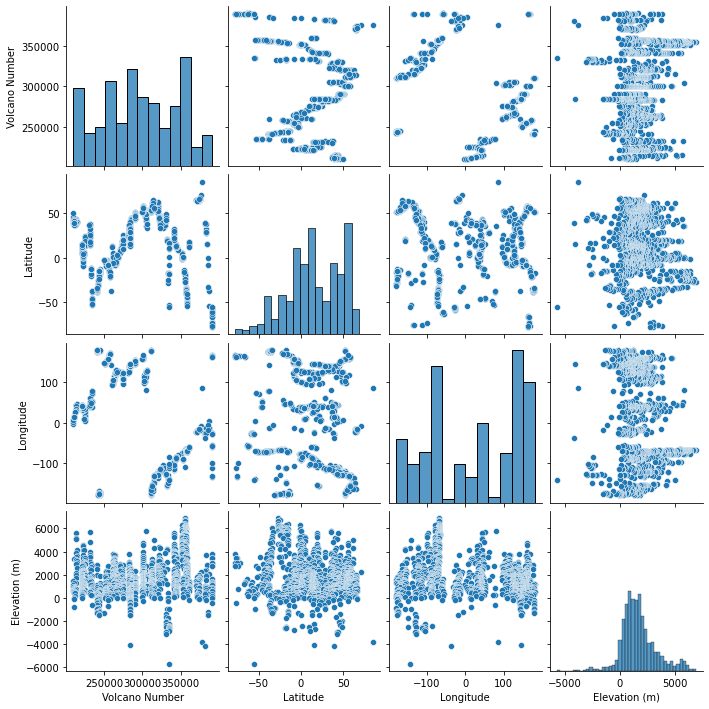

In [120]:
sns.pairplot(df)

<AxesSubplot:>

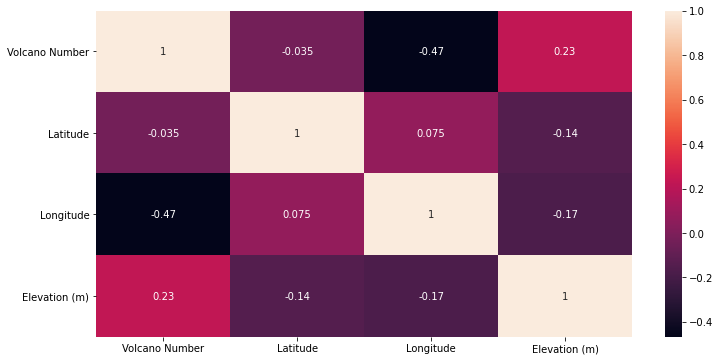

In [121]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)